# Practical 4: EDA - Exercise Solution

**CSM6120@Aberystwyth University**


##### Objective:
• To be able to perform Exploratory Data Analysis (EDA) using Python


##### Problem and Dataset Information:
• Problem: Prediction of loan (the customer should get a loan from ABC bank or not).

• Data: Information of bank customers (bank.csv).

## Import Python packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Basic Exploration

In [3]:
# Choice 1
# If you make use of a Colab notebook, you can browse and uplod the .csv data file, by the folllwing code section 
from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['bank.csv']))


# Choice 2
# However, if you exploit a software like Anaconda/Jupyter notebook locally in your machine, put the data file in ths same folder as the notebook file
# Then, use the following code section, instead of the one given above.

# df = pd.read_csv('weather.csv')

Saving bank.csv to bank (1).csv


##### 1.1 How many samples? 

In [4]:
# number of samples and features
df.shape

(50, 10)

Answer: 50

##### 1.2 How many features? 

Answer: 10

##### 1.3 List all feature names

In [5]:
# Column names
df.columns

Index(['customer_id', 'age', 'gender', 'job', 'marital_status', 'education',
       'credit_card', 'balance', 'housing', 'loan'],
      dtype='object')

##### 1.4 Explore the first 5 samples

In [6]:
df.head()

,customer_id,age,gender,job,marital_status,education,credit_card,balance,housing,loan
0,1,30.0,M,unemployed,married,primary,no,1787.0,no,no
1,2,33.0,F,services,married,NaN,no,4789.0,yes,yes
2,3,35.0,M,management,single,tertiary,no,1350.0,yes,no
3,4,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,yes
4,5,59.0,F,blue-collar,married,secondary,no,0.0,yes,no


##### 1.5 In your opinion, what features shoud have **numerical** data type?

Answer: 'customer_id', 'age', 'balance'

##### 1.6 In your opinion, what features shoud have **categorical** data type?

Answer: 'gender', 'job', 'marital_status', 'education',
       'credit_card', 'housing', 'loan'

##### 1.7 List data type for each feature and take note of useful information.

In [7]:
# Identification of data types:
df.dtypes

customer_id         int64
age               float64
gender             object
job                object
marital_status     object
education          object
credit_card        object
balance           float64
housing            object
loan               object
dtype: object

Note:
------
**gender** should be nominal (object)

##### 1.8 Summary statistics for numeric features:
Examine *count, mean, min, median (50%) and max* for each numeric feature and take note of useful information. 

In [8]:
# Summary statistics for numeric features
df.describe()

,customer_id,age,balance
count,50.00000,49.000000,42.000000
mean,25.50000,49.795918,1309.476190
std,14.57738,74.484892,1984.649213
min,1.00000,-20.000000,-849.000000
25%,13.25000,32.000000,151.500000
50%,25.50000,38.000000,548.000000
75%,37.75000,44.000000,1677.750000
max,50.00000,550.000000,9374.000000


Note:
------

**age:**
- Possible 1 missing value (count = 49)
- Possible wrong values of Min (-1) and Max (550)
- Comparing Mean=49 and Median=38 --> Possible outliers on the right

**balance:**
- Possible 8 missing values (count = 42)
- Comparing Mean=1309 and Median=548 --> Possible outliers on the right

##### 1.9 Summary statistics for categorical features:
Examine *count, unique, and mode (top)* for each categorical feature and take note of useful information.

In [9]:
# Summary statistics for String (object) and Boolean columns:
df.describe(include=['object'])

,gender,job,marital_status,education,credit_card,housing,loan
count,47,49,47,42,47,49,49
unique,5,11,4,4,2,4,2
top,M,management,married,tertiary,no,yes,no
freq,23,12,29,16,44,25,35


Note:
-----
**gender**
- Possible 3 missing values (count = 47)
- Possible wrong values (unique = 5, should be 2 --> M and F)

**job**
- Possible 1 missing value (count = 49)

**marital_status**
- Possible wrong values (unique = 4, should be 3)
- Possible 3 missing values (count = 47)

**education**
- Possible 8 missing values (count = 42)

**credit_card**
- Possible 3 missing values (count = 47)
- A lot of ‘no’ values (freq = 44 out of 50)

**housing**
- Possible 1 missing value (count = 49)
- Possible wrong values (unique = 4, should be 2)

**loan**
- Possible 1 missing value (count = 49)
- "Class" should not be missing.

##### 1.10 Which features have **missing values** more than 10%? 
Take note of useful information.

In [10]:
# Finding missing values for each feature:
#df.isnull().sum()

#Percentage of Missing values for each feature:
df.isnull().sum()/len(df)*100

customer_id        0.0
age                2.0
gender             6.0
job                2.0
marital_status     6.0
education         16.0
credit_card        6.0
balance           16.0
housing            2.0
loan               2.0
dtype: float64

Note:
-----
- education 16%
- balance 16%
- loan 2% --> Sample with missing ‘loan’ should be removed because ‘loan’ is a class for this problem.

##### 1.11 Which samples have **missing values** more than 50? 
Specify their indexes and take note of useful information.

In [11]:
# Finding missing values for each sample:
#df.isnull().sum(axis=1)

#Percentages of missing values for each sample:
df.isnull().sum(axis=1)/len(df.columns)*100

0      0.0
1     10.0
2      0.0
3     70.0
4      0.0
5     10.0
6      0.0
7     10.0
8      0.0
9     10.0
10     0.0
11    10.0
12     0.0
13    20.0
14     0.0
15     0.0
16    20.0
17     0.0
18     0.0
19     0.0
20    10.0
21     0.0
22     0.0
23    10.0
24     0.0
25     0.0
26    10.0
27     0.0
28     0.0
29    10.0
30     0.0
31    10.0
32     0.0
33    10.0
34    10.0
35    10.0
36     0.0
37    10.0
38     0.0
39     0.0
40    10.0
41     0.0
42    10.0
43     0.0
44    10.0
45    10.0
46     0.0
47     0.0
48     0.0
49     0.0
dtype: float64

In [12]:
# Identify rows with missing values using threshold

# Specify your choice of threshold
threshold = 50 # We nomally allows only 30%-40% missing value for each row

# Get row-index for rows with missing values >= threshold
df.index[(df.isnull().sum(axis=1)/len(df.columns)*100) >= threshold]

# Get data of row(s) with missing values > threshold
#df.iloc[df.index[(df.isnull().sum(axis=1)/len(df.columns)*100) >= threshold]]

Int64Index([3], dtype='int64')

Note:
-----
Sample index no. 3 has missing value 70% --> Too many missing value. This sample should be removed from the analysis

## 2. Univariate Analysis

### 2.1 Exploring Categorical Features
Examine **count plots** for each categorical feature and take note of useful information.

In [13]:
df.columns

Index(['customer_id', 'age', 'gender', 'job', 'marital_status', 'education',
       'credit_card', 'balance', 'housing', 'loan'],
      dtype='object')

In [14]:
# Create a new data frame containing only categorical features
#cat_data = df.select_dtypes(include='object')
cat_data = df[['gender', 'job', 'marital_status', 'education', 'credit_card', 'housing']] 
cat_data.head()

,gender,job,marital_status,education,credit_card,housing
0,M,unemployed,married,primary,no,no
1,F,services,married,NaN,no,yes
2,M,management,single,tertiary,no,yes
3,M,NaN,NaN,NaN,NaN,NaN
4,F,blue-collar,married,secondary,no,yes


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

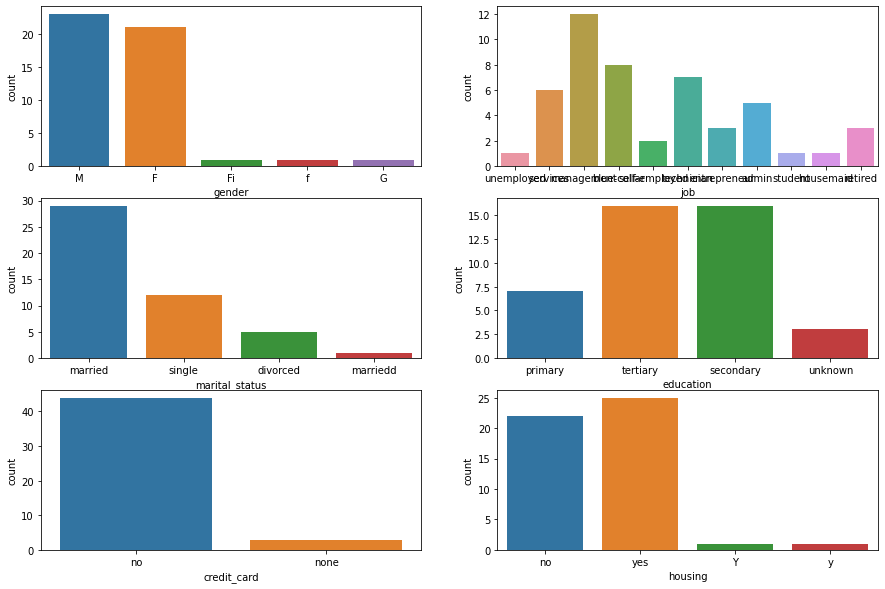

In [15]:
# Create count plots for all catgorical features
fig, ax = plt.subplots(3, 2, figsize=(15, 10))
for i, subplot in zip(cat_data.columns, ax.flatten()):
    sns.countplot(cat_data[i], ax=subplot)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'unemployed'),
 Text(0, 0, 'services'),
 Text(0, 0, 'management'),
 Text(0, 0, 'blue-collar'),
 Text(0, 0, 'self-employed'),
 Text(0, 0, 'technician'),
 Text(0, 0, 'entrepreneur'),
 Text(0, 0, 'admin'),
 Text(0, 0, 'student'),
 Text(0, 0, 'housemaid'),
 Text(0, 0, 'retired')]

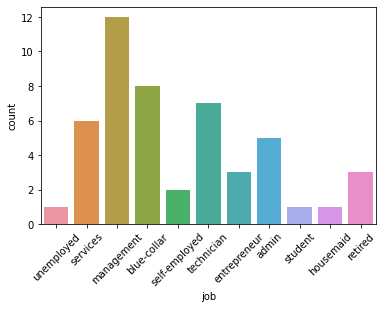

In [16]:
# count plot for job with 45 degree rotated label
chart = sns.countplot(cat_data.job)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

Note:
-----
**gender**
- 3 wrong values (Fi, F, G) --> possible typos for ‘F’

**job**
- Too many values? Should be grouped?

**marital_status**
- 1 wrong values (marriedd) --> possible typo for ‘married’

**education**
- ‘unknown’ can be the same meaning as missing values

**credit_card**
- ‘none’ has the same meaning as ‘no’ --> all samples have the same value for this feature . This feature should be removed from the analysis

**housing**
- 2 wrong values (Y, y)  possible typos for ‘yes’

**loan**
- Count = 49 --> Sample with missing ‘loan’ should be removed because it’s a class for this problem.

### 2.2 Exploring Numeric Features
Examine **histograms and box plots** for each numeric feature and take note of useful information.

In [17]:
#num_data = df.select_dtypes(include='number') # get all numberic attribues
num_data = df[['age', 'balance']] 
num_data.head()

,age,balance
0,30.0,1787.0
1,33.0,4789.0
2,35.0,1350.0
3,NaN,NaN
4,59.0,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faab1348d30>,
      dtype=object)

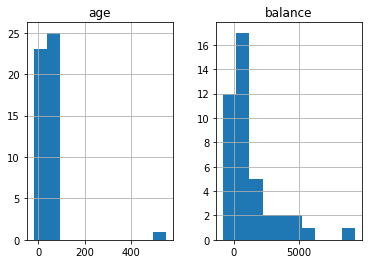

In [18]:
num_data.hist()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


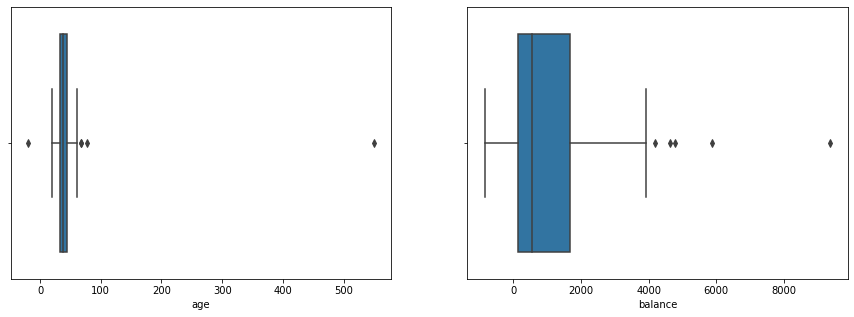

In [19]:
# Create box plots for all numeric features
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
for i, subplot in zip(num_data.columns, ax.flatten()):
    sns.boxplot(num_data[i], ax=subplot)

Note:
-----

**age**
- Histogram: 2 possible wrong values (the first bar covers values and the right-most value)
- Box plot: 2 possible wrong values (a negative value and a value more than 100)

**balance**
- Box plot: 5 possible wrong values


## 3. Bivariate Analysis

### 3.1 Exploring Categorical Features
Examine **count plots** between **a categorical feature and class** and take note of useful information.

##### Count Plots

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

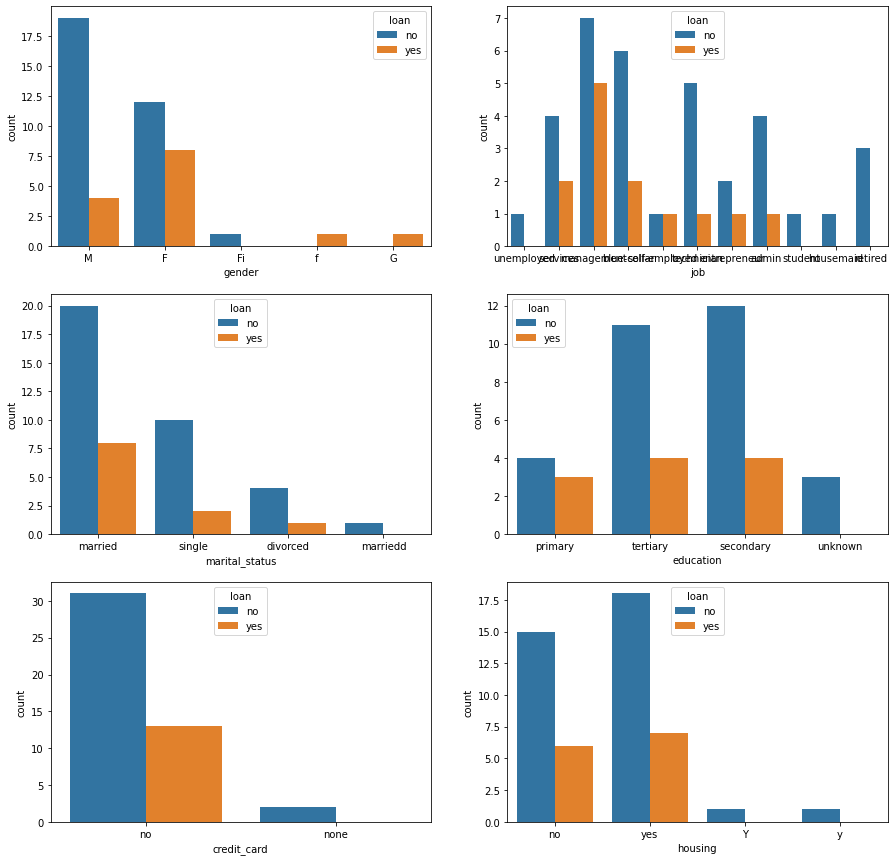

In [20]:
# Create count plots for all nominal features and class
fig, ax = plt.subplots(3, 2, figsize=(15, 15))
for i, subplot in zip(cat_data.columns, ax.flatten()):
    sns.countplot(cat_data[i],hue=df.loan, ax=subplot)

[Text(0, 0, 'unemployed'),
 Text(0, 0, 'services'),
 Text(0, 0, 'management'),
 Text(0, 0, 'blue-collar'),
 Text(0, 0, 'self-employed'),
 Text(0, 0, 'technician'),
 Text(0, 0, 'entrepreneur'),
 Text(0, 0, 'admin'),
 Text(0, 0, 'student'),
 Text(0, 0, 'housemaid'),
 Text(0, 0, 'retired')]

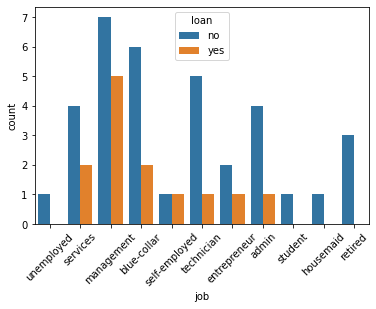

In [21]:
# Count plot between a categorical feature and class
chart = sns.countplot(data=df, x='job', hue='loan')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

Note:
---

- **Job** as ‘unemployed’, ‘student’, ‘housemaid’ and ‘retired’  always have ‘loan‘ as ‘no’

### 3.2 Exploring Categorical Features
Examine **count plots** between **2 categorical features** and take note of useful information.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

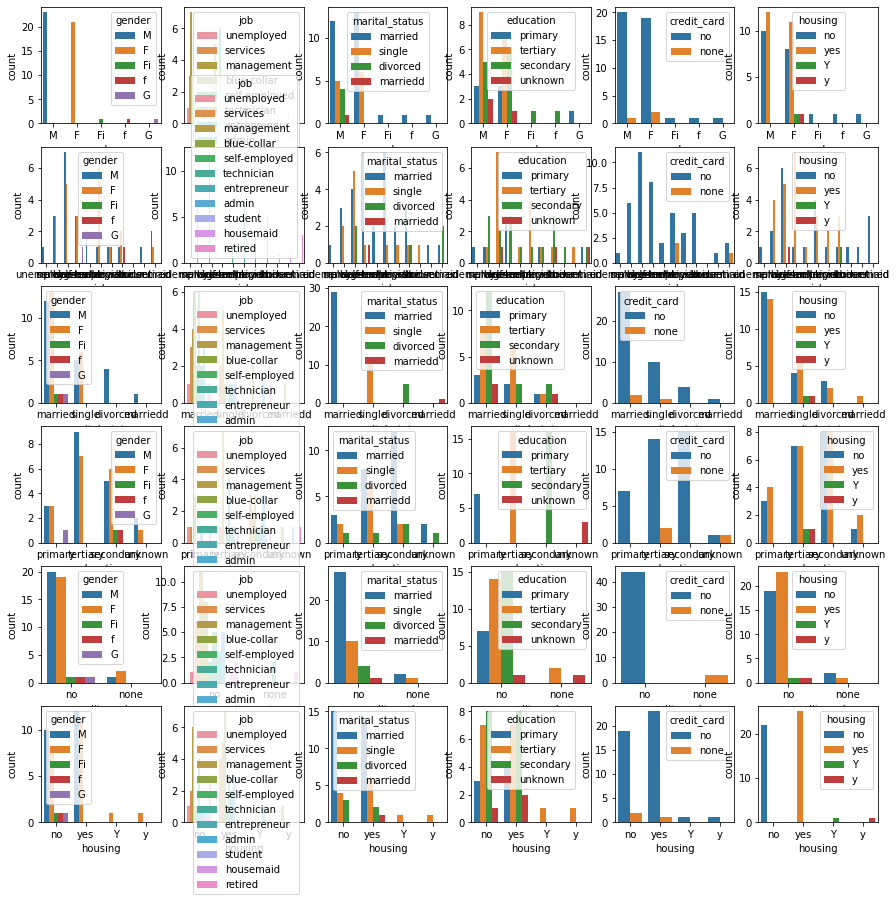

In [22]:
# Create count plots between 2 categorical features
fig, ax = plt.subplots(6, 6, figsize=(15, 15))
subplot = ax.flatten()
s = 0 # index for subplots
for j in cat_data.columns:
    for i in cat_data.columns:
        sns.countplot(cat_data[j],hue=cat_data[i], ax=subplot[s])
        s = s+1

[Text(0, 0, 'primary'),
 Text(0, 0, 'tertiary'),
 Text(0, 0, 'secondary'),
 Text(0, 0, 'unknown')]

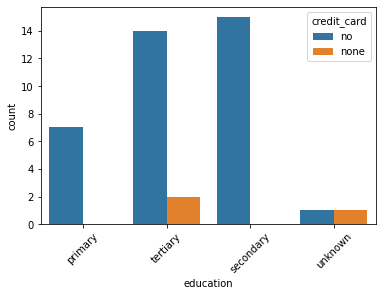

In [23]:
# Count plot between 'education' and 'credit_card'
chart = sns.countplot(data=df, x='education', hue='credit_card')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

Note:
---
- **Education** as ‘primary’ and ‘secondary’ always have no credit card.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

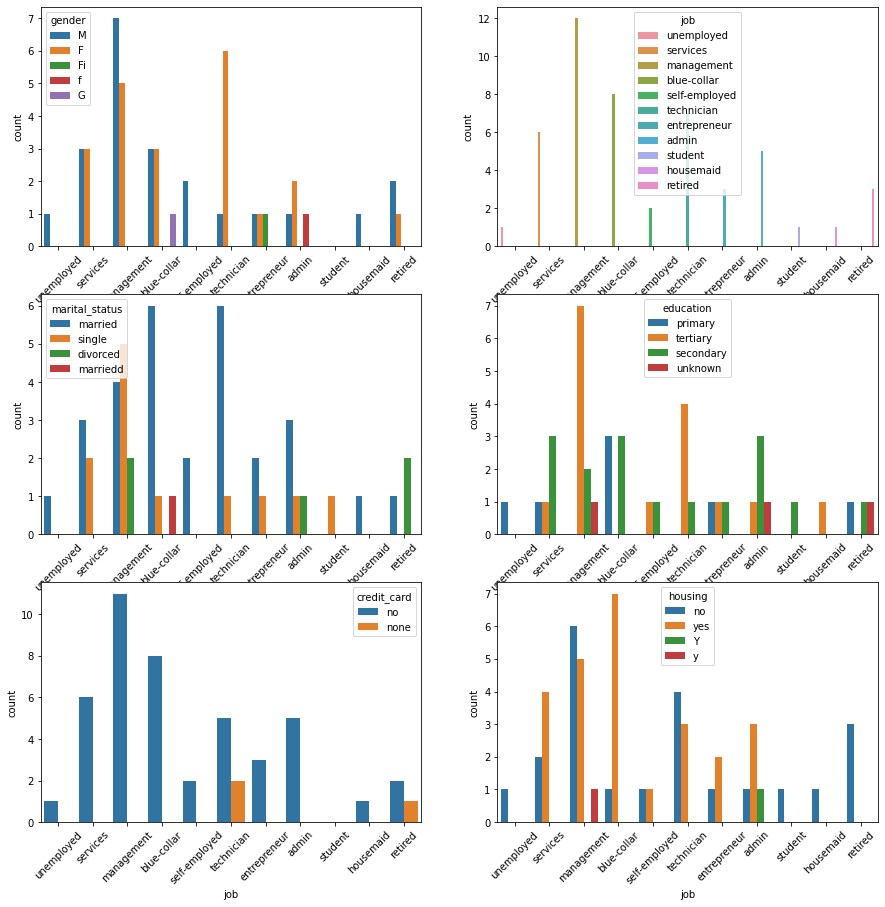

In [24]:
# Create count plots between 'job' and other categorical features
fig, ax = plt.subplots(3, 2, figsize=(15, 15))
subplot = ax.flatten()
s = 0 # index for subplots
#for j in cat_data.columns:
for i in cat_data.columns:
        chart = sns.countplot(cat_data['job'],hue=cat_data[i], ax=subplot[s])
        chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
        s = s+1

Note:
---
- Most **Job** types have no credit card, except ‘technician’ and ‘retired’.

### 3.3 Exploring Numeric Features
Examine **pair plot and heatmap** and take note of useful information.

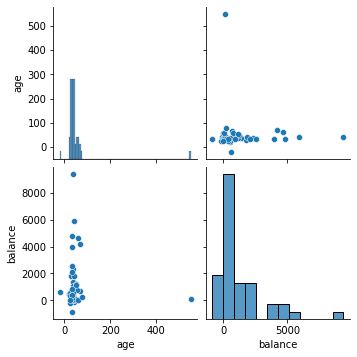

In [25]:
sns.pairplot(num_data)

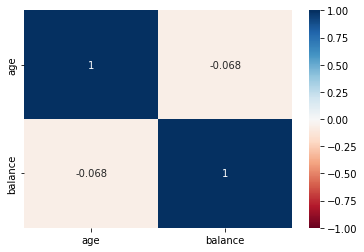

In [26]:
# Cretae correlation heatmaps between numeric features
corr = num_data.corr()
sns.heatmap(corr, cmap="RdBu",
            vmin=-1, vmax=1, annot=True)

Note:
---
- No obvious relationship between **age** and **balance**

## 4. Multivariate Analysis

### 4.1 Exploring Categorical Features
Examine **cat plots** and take note of useful information.

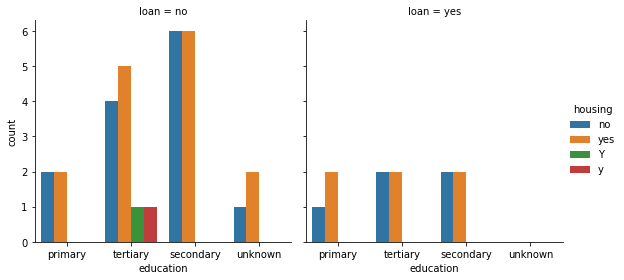

In [27]:
# cat plot between 2 categorical features and class
sns.catplot(x="education", hue="housing", 
            col="loan",data=df, kind="count", 
            height=4);

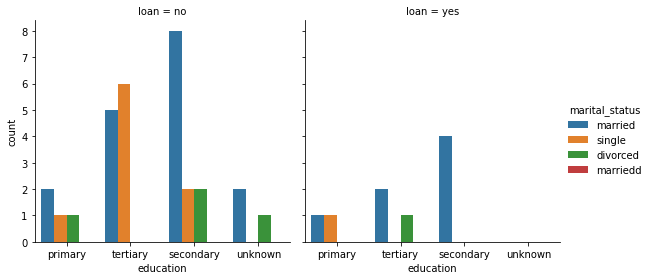

In [28]:
# cat plot between 2 categorical features and class
sns.catplot(x="education", hue="marital_status", 
            col="loan",data=df, kind="count", 
            height=4);

Note:
----
- Education=‘secondary’ and marital_status=‘married’ always have loan = ‘yes’

### 4.2 Exploring Numeric Features
Examine **scatterplot and pair plot** and take note of useful information.

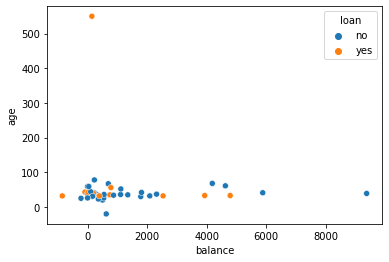

In [29]:
# Create scatter plot between 2 numeric features and class
sns.scatterplot(x='balance', y='age',
                hue='loan',data=df)

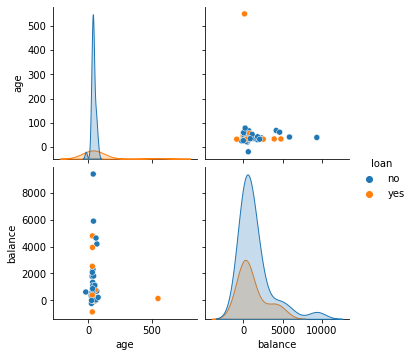

In [30]:
# Select numeric features and class 
num_data_class=df[['age','balance','loan']]
# Pair plot between numeric features and class
sns.pairplot(num_data_class, hue='loan')

Note:
---
- No obvious relationship to be seen